In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
#python package version information
print('Python version: {}'.format(sys.version))
print('Numpy version: {}'.format(np.__version__))
print('Pandas version: {}'.format(pd.__version__))
print('MatlpotLib version: {}'.format(matplotlib.__version__))
print('Seaborn version: {}'.format(sns.__version__))
print('Sci-Kit Learn version: {}'.format(sklearn.__version__))
print('XGBoost version: {}'.format(xgboost.__version__))

Python version: 3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]
Numpy version: 1.21.5
Pandas version: 1.3.5
MatlpotLib version: 3.2.2
Seaborn version: 0.11.2
Sci-Kit Learn version: 1.0.2
XGBoost version: 0.90


In [ ]:
oildf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=crude-oil-brent&months=360")[1]
coaldf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=coal-australian&months=360")[1]
gasdf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=natural-gas&months=360")[4]
sugardf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=sugar&months=360")[4]
oredf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=iron-ore&months=360")[1]
copperdf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=copper&months=360")[4]

In [ ]:
copperdf

,Month,Price,Change
0,Mar 1992,2227.33,-
1,Apr 1992,2215.33,-0.54%
2,May 1992,2216.52,0.05%
3,Jun 1992,2299.20,3.73%
4,Jul 1992,2520.32,9.62%
...,...,...,...
356,Nov 2021,9728.90,-1.02%
357,Dec 2021,9551.18,-1.83%
358,Jan 2022,9782.34,2.42%
359,Feb 2022,9943.17,1.64%


In [ ]:
oildf.drop('Change', inplace = True, axis = 1)
coaldf.drop('Change', inplace = True, axis = 1)
gasdf.drop('Change', inplace = True, axis = 1)
sugardf.drop('Change', inplace = True, axis = 1)
oredf.drop('Change', inplace = True, axis = 1)
copperdf.drop('Change', inplace = True, axis = 1)

In [ ]:
oildf.rename(columns = {'Price': 'oil_price'}, inplace = True)
coaldf.rename(columns = {'Price': 'coal_price'}, inplace = True)
gasdf.rename(columns = {'Price': 'gas_price'}, inplace = True)
sugardf.rename(columns = {'Price': 'sugar_price'}, inplace = True)
oredf.rename(columns = {'Price': 'ore_price'}, inplace = True)
copperdf.rename(columns = {'Price': 'copper_price'}, inplace = True)

In [ ]:
totaldf = (oildf.merge(coaldf).merge(gasdf).merge(sugardf).merge(oredf).merge(copperdf))

In [ ]:
totaldf

,Month,oil_price,coal_price,gas_price,sugar_price,ore_price,copper_price
0,Mar 1992,17.60,39.50,1.28,0.18,33.10,2227.33
1,Apr 1992,18.95,39.50,1.47,0.21,33.10,2215.33
2,May 1992,19.90,39.50,1.59,0.21,33.10,2216.52
3,Jun 1992,21.15,39.50,1.56,0.23,33.10,2299.20
4,Jul 1992,20.25,39.50,1.75,0.23,33.10,2520.32
...,...,...,...,...,...,...,...
354,Sep 2021,74.60,185.69,5.11,0.43,124.52,9324.71
355,Oct 2021,83.65,224.51,5.48,0.42,122.91,9829.22
356,Nov 2021,80.77,157.48,5.02,0.43,96.24,9728.90
357,Dec 2021,74.31,169.65,3.73,0.42,116.96,9551.18


In [ ]:
totaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 358
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         359 non-null    object 
 1   oil_price     359 non-null    float64
 2   coal_price    359 non-null    float64
 3   gas_price     359 non-null    float64
 4   sugar_price   359 non-null    float64
 5   ore_price     359 non-null    float64
 6   copper_price  359 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.4+ KB


In [ ]:
totaldf.describe()

,oil_price,coal_price,gas_price,sugar_price,ore_price,copper_price
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,51.791588,62.600418,3.829164,0.290056,73.112256,4679.996462
std,32.386292,35.278593,2.133143,0.112934,49.440427,2589.748176
min,9.800000,22.250000,1.280000,0.110000,26.470000,1377.280000
25%,21.550000,33.600000,2.305000,0.210000,30.030000,2053.845000
50%,46.990000,52.750000,3.030000,0.270000,62.750000,4731.260000
75%,73.100000,85.245000,4.670000,0.350000,101.290000,6936.250000
max,133.870000,224.510000,13.520000,0.650000,214.430000,10161.970000


In [ ]:
continuous_features = [feature for feature in totaldf.columns if totaldf[feature].dtypes != 'O']
print(continuous_features)

['oil_price', 'coal_price', 'gas_price', 'sugar_price', 'ore_price', 'copper_price']


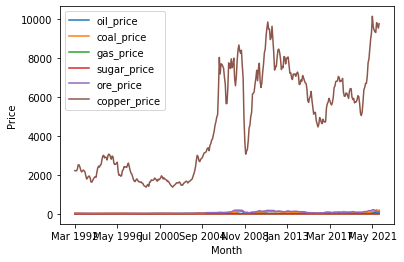

In [ ]:
totaldf.plot(x = 'Month', y = continuous_features)
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

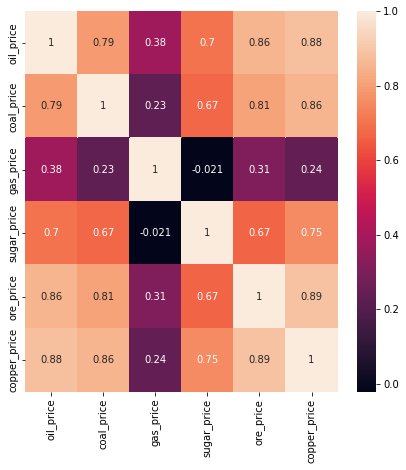

In [ ]:
cor_mat = totaldf.corr()
fig = plt.figure(figsize=(7, 7))
sns.heatmap(cor_mat,annot = True)
plt.show()

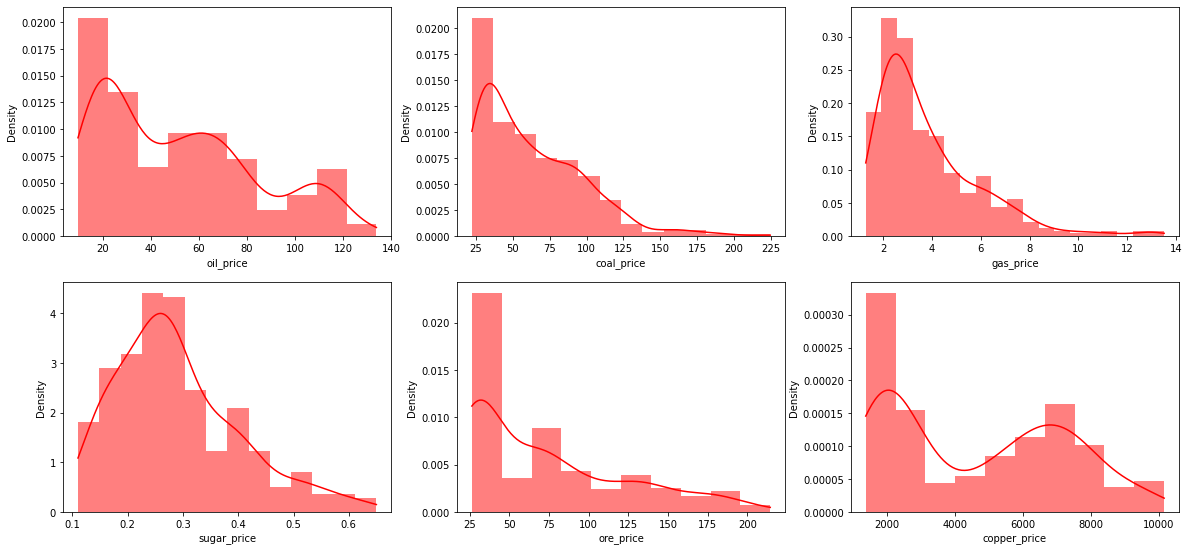

In [ ]:
plt.figure(figsize=(20, 60))
plotnumber = 1
for feature in continuous_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.histplot(totaldf[feature], color = "red", kde = True, stat = "density", linewidth = 0)
    plotnumber+=1
plt.show()

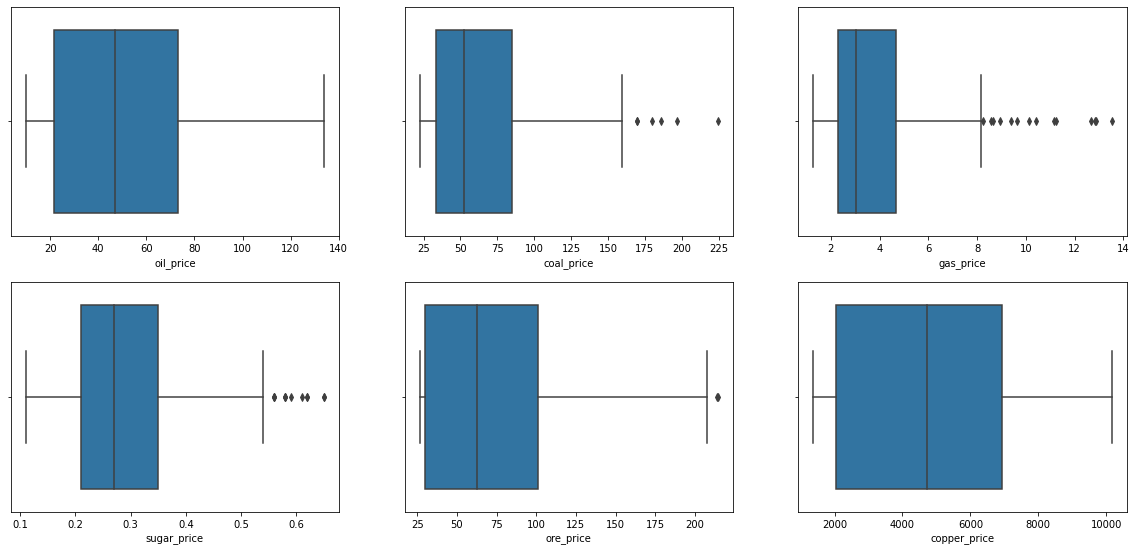

In [ ]:
plt.figure(figsize=(20, 60))
plotnumber = 1
for feature in continuous_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(x = totaldf[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

## Price predictions master##

In [ ]:
def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'RandomForestRegressor': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100, 130],
                'criterion': ['squared_error'],
                'max_depth': range(2, 4, 1),
                'max_features': ['auto','log2']
            }
        },
        'XGBRegressor': {
            'model': XGBRegressor(),
            'params': {
                'objective': ['reg:squarederror'],
                'learning_rate': [0.5, 0.1, 0.01, 0.001],
                'max_depth': [2, 3],
                'n_estimators': [10, 50, 100, 200]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'],cv = cv, return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

## Oil price predictions ##

In [ ]:
target = 'oil_price'

In [ ]:
print(cor_mat[target])

oil_price       1.000000
coal_price      0.790553
gas_price       0.383752
sugar_price     0.700688
ore_price       0.856426
copper_price    0.883285
Name: oil_price, dtype: float64


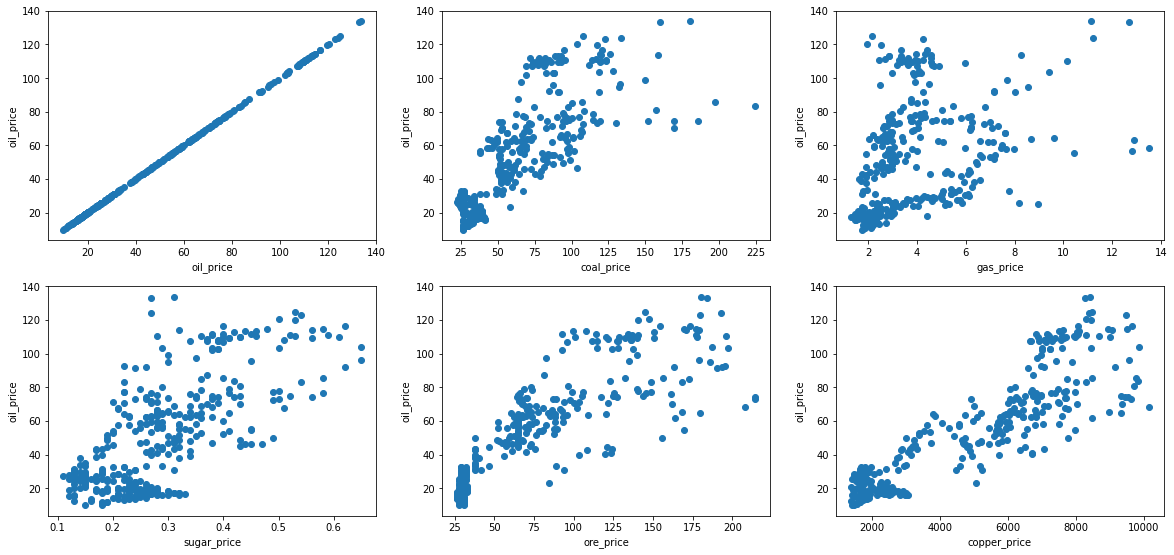

In [ ]:
plt.figure(figsize=(20, 60))
plotnumber = 1
for feature in continuous_features:
    ax = plt.subplot(12, 3, plotnumber)
    plt.scatter(totaldf[feature], totaldf[target])
    plt.xlabel(feature)
    plt.ylabel(target)
    plotnumber+=1
plt.show()

In [ ]:
X = totaldf.drop([target,'Month'],axis=1)
y = totaldf[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=0)

In [ ]:
X

,coal_price,gas_price,sugar_price,ore_price,copper_price
0,39.50,1.28,0.18,33.10,2227.33
1,39.50,1.47,0.21,33.10,2215.33
2,39.50,1.59,0.21,33.10,2216.52
3,39.50,1.56,0.23,33.10,2299.20
4,39.50,1.75,0.23,33.10,2520.32
...,...,...,...,...,...
354,185.69,5.11,0.43,124.52,9324.71
355,224.51,5.48,0.42,122.91,9829.22
356,157.48,5.02,0.43,96.24,9728.90
357,169.65,3.73,0.42,116.96,9551.18


In [ ]:
len(X_train)

287

In [ ]:
len(X_test)

72

In [ ]:
pd.set_option('display.max_colwidth', 100)
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,decision_tree,0.891808,"{'criterion': 'friedman_mse', 'splitter': 'random'}"
1,RandomForestRegressor,0.888450,"{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}"
2,XGBRegressor,0.919956,"{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}"


In [ ]:
model_xgb = XGBRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 200, objective = 'reg:squarederror')

In [ ]:
model_xgb.fit(X_train, y_train)

XGBRegressor(n_estimators=200, objective='reg:squarederror')

In [ ]:
model_xgb.score(X_test, y_test)

0.9137095554100808

In [ ]:
y_pred = model_xgb.predict(X_test)
y_pred

array([ 18.942595, 113.9781  ,  27.07047 ,  83.0571  ,  19.598166,
        19.68296 ,  99.71881 ,  16.754887,  17.051973,  21.183111,
        15.962595,  42.777046,  85.05483 ,  55.973145,  37.777252,
        47.92654 ,  28.412474,  47.810287,  19.602932,  60.383858,
        79.74494 , 107.362015,  20.006887,  25.546679, 103.50262 ,
        77.46466 ,  13.739786,  13.231448,  16.433838,  27.412148,
       107.81254 ,  43.032955,  18.379616,  19.602932,  16.088291,
        22.17181 ,  27.746597,  88.05186 ,  58.343746,  16.58748 ,
        17.129082,  52.591156,  44.129707,  63.016933,  94.796   ,
        79.76702 , 109.668106,  20.618622,  13.739786,  62.40483 ,
        71.669106,  28.816216,  67.49833 ,  82.35441 ,  21.290625,
        17.376865, 107.15032 , 104.91445 ,  99.394226,  92.460915,
        17.376865,  27.053057,  27.525955,  21.121212,  73.68217 ,
        38.76002 ,  78.44235 ,  60.108555,  59.03584 ,  95.79693 ,
        17.376865,  21.564302], dtype=float32)

In [ ]:
y_test

6       20.25
259    109.48
106     25.64
215     74.31
90      22.40
        ...  
173     73.61
296     46.44
198     99.06
63      17.55
124     25.77
Name: oil_price, Length: 72, dtype: float64

In [ ]:
error_score = metrics.r2_score(y_test,y_pred)
print("R squared:",error_score)

R squared: 0.9137095554100808


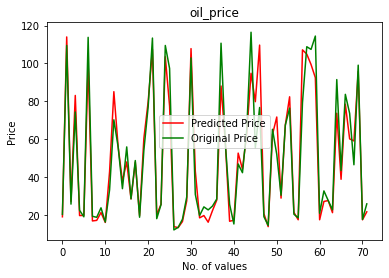

In [ ]:
plt.plot(y_pred,color="red",label="Predicted Price")
plt.plot(list(y_test),color="green",label="Original Price")
plt.title(target)
plt.xlabel('No. of values')
plt.ylabel('Price')
plt.legend()
plt.show()

## Coal price predictions ##

In [ ]:
target = 'coal_price'

In [ ]:
print(cor_mat[target])

oil_price       0.790553
coal_price      1.000000
gas_price       0.233120
sugar_price     0.674670
ore_price       0.809668
copper_price    0.855654
Name: coal_price, dtype: float64


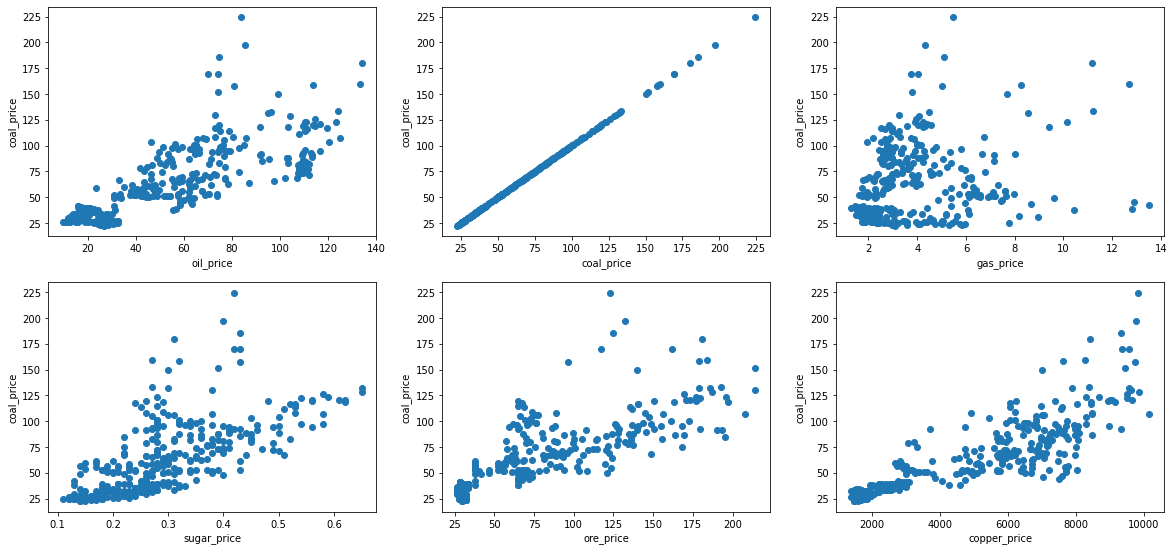

In [ ]:
plt.figure(figsize=(20, 60))
plotnumber = 1
for feature in continuous_features:
    ax = plt.subplot(12, 3, plotnumber)
    plt.scatter(totaldf[feature], totaldf[target])
    plt.xlabel(feature)
    plt.ylabel(target)
    plotnumber+=1
plt.show()

In [ ]:
X = totaldf.drop([target,'Month'],axis=1)
y = totaldf[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=0)

In [ ]:
X

,oil_price,gas_price,sugar_price,ore_price,copper_price
0,17.60,1.28,0.18,33.10,2227.33
1,18.95,1.47,0.21,33.10,2215.33
2,19.90,1.59,0.21,33.10,2216.52
3,21.15,1.56,0.23,33.10,2299.20
4,20.25,1.75,0.23,33.10,2520.32
...,...,...,...,...,...
354,74.60,5.11,0.43,124.52,9324.71
355,83.65,5.48,0.42,122.91,9829.22
356,80.77,5.02,0.43,96.24,9728.90
357,74.31,3.73,0.42,116.96,9551.18


In [ ]:
len(X_train)

287

In [ ]:
len(X_test)

72

In [ ]:
pd.set_option('display.max_colwidth', 100)
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,decision_tree,0.816254,"{'criterion': 'squared_error', 'splitter': 'best'}"
1,RandomForestRegressor,0.792538,"{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 50}"
2,XGBRegressor,0.831436,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}"


In [ ]:
model_xgb = XGBRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 200, objective = 'reg:squarederror')

In [ ]:
model_xgb.fit(X_train, y_train)

XGBRegressor(n_estimators=200, objective='reg:squarederror')

In [ ]:
model_xgb.score(X_test, y_test)

0.8823184183149224

In [ ]:
y_pred = model_xgb.predict(X_test)
y_pred

array([ 37.82049 ,  83.80784 ,  37.972824,  90.809456,  26.268326,
        29.037449, 117.3253  ,  36.949615,  38.994663,  26.260496,
        34.286114,  51.12691 ,  61.120644,  81.671875,  56.403873,
        66.01465 ,  27.201399,  57.631214,  37.34243 ,  73.248535,
        78.784645,  89.425415,  42.340256,  23.704853,  79.130844,
        71.233086,  30.179176,  27.5793  ,  29.9992  ,  28.611202,
        92.85566 ,  41.99464 ,  36.39927 ,  32.640553,  32.271667,
        26.1516  ,  24.91445 ,  88.95936 ,  58.84514 ,  29.535109,
        29.737053,  89.80233 ,  59.602253,  76.11617 , 134.84673 ,
        76.99097 ,  95.75746 ,  33.113018,  31.04148 ,  77.642815,
        74.95538 ,  26.883375,  53.78608 ,  91.064384,  37.954063,
        36.949615,  95.40237 ,  70.024315,  71.579   , 153.55779 ,
        37.064552,  28.732891,  26.665003,  37.39347 ,  94.275536,
        57.163147, 176.5089  ,  79.238976,  68.35724 , 112.312675,
        38.422436,  26.511494], dtype=float32)

In [ ]:
y_test

6       39.50
259     79.41
106     32.10
215     94.19
90      26.10
        ...  
173     50.94
296    103.43
198    150.00
63      34.50
124     23.15
Name: coal_price, Length: 72, dtype: float64

In [ ]:
error_score = metrics.r2_score(y_test,y_pred)
print("R squared:",error_score)

R squared: 0.8823184183149224


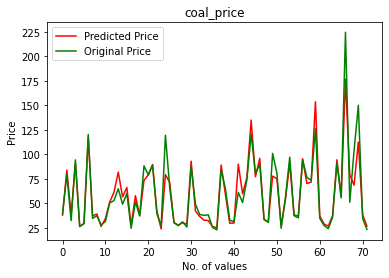

In [ ]:
plt.plot(y_pred,color="red",label="Predicted Price")
plt.plot(list(y_test),color="green",label="Original Price")
plt.title(target)
plt.xlabel('No. of values')
plt.ylabel('Price')
plt.legend()
plt.show()

## Gas price predictions ##

In [ ]:
target = 'gas_price'

In [ ]:
print(cor_mat[target])

oil_price       0.383752
coal_price      0.233120
gas_price       1.000000
sugar_price    -0.020924
ore_price       0.307179
copper_price    0.238688
Name: gas_price, dtype: float64


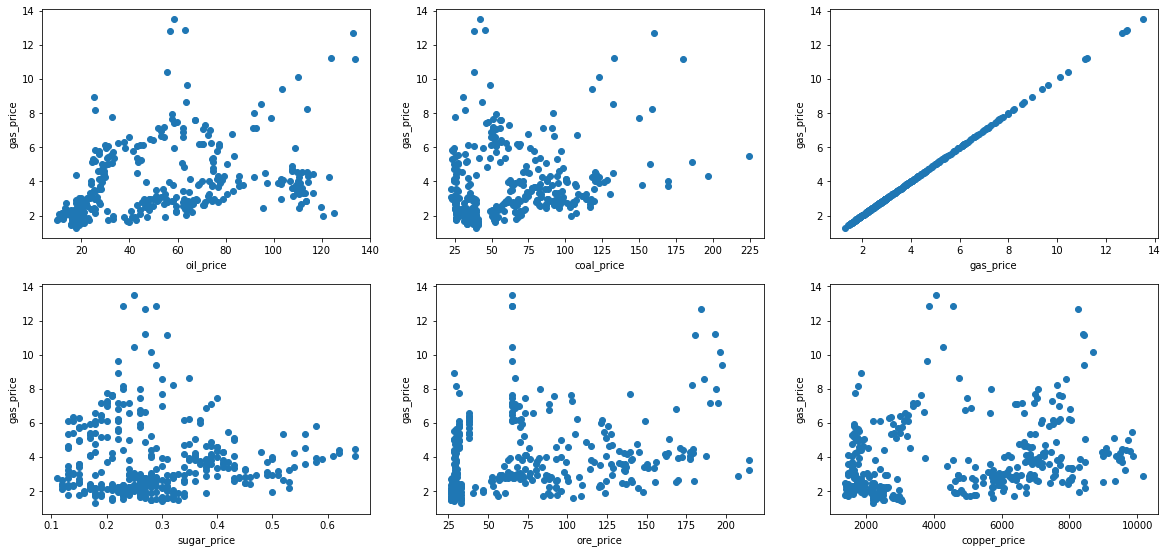

In [ ]:
plt.figure(figsize=(20, 60))
plotnumber = 1
for feature in continuous_features:
    ax = plt.subplot(12, 3, plotnumber)
    plt.scatter(totaldf[feature], totaldf[target])
    plt.xlabel(feature)
    plt.ylabel(target)
    plotnumber+=1
plt.show()

In [ ]:
X = totaldf.drop([target,'Month'],axis=1)
y = totaldf[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=0)

In [ ]:
X

,oil_price,coal_price,sugar_price,ore_price,copper_price
0,17.60,39.50,0.18,33.10,2227.33
1,18.95,39.50,0.21,33.10,2215.33
2,19.90,39.50,0.21,33.10,2216.52
3,21.15,39.50,0.23,33.10,2299.20
4,20.25,39.50,0.23,33.10,2520.32
...,...,...,...,...,...
354,74.60,185.69,0.43,124.52,9324.71
355,83.65,224.51,0.42,122.91,9829.22
356,80.77,157.48,0.43,96.24,9728.90
357,74.31,169.65,0.42,116.96,9551.18


In [ ]:
len(X_train)

287

In [ ]:
len(X_test)

72

In [ ]:
pd.set_option('display.max_colwidth', 100)
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,decision_tree,0.596845,"{'criterion': 'friedman_mse', 'splitter': 'random'}"
1,RandomForestRegressor,0.510091,"{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 100}"
2,XGBRegressor,0.732239,"{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}"


In [ ]:
model_xgb = XGBRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 200, objective = 'reg:squarederror')

In [ ]:
model_xgb.fit(X_train, y_train)

XGBRegressor(n_estimators=200, objective='reg:squarederror')

In [ ]:
model_xgb.score(X_test, y_test)

0.616501727888813

In [ ]:
y_pred = model_xgb.predict(X_test)
y_pred

array([1.7817814, 3.8129337, 4.841311 , 3.8573892, 2.6382368, 2.376769 ,
       3.8186352, 2.4253085, 1.9836293, 3.496521 , 1.8550941, 3.6213071,
       5.9968076, 2.6068654, 5.9028144, 3.15263  , 4.6648965, 6.1555834,
       2.4043715, 3.4218664, 4.019389 , 3.0856395, 2.847569 , 3.6431434,
       3.3754675, 4.082115 , 2.3635278, 2.435941 , 2.6012006, 4.869578 ,
       3.732344 , 4.329072 , 2.5376668, 4.8521986, 2.9040167, 3.8411522,
       3.4850914, 3.786949 , 7.167525 , 3.806275 , 2.1639135, 4.2898483,
       2.3583853, 3.3245919, 3.6505451, 2.4353628, 3.8162   , 2.5134566,
       2.3783355, 2.9403799, 2.504024 , 6.218467 , 7.0976334, 4.1642485,
       2.2329173, 2.3814979, 3.6468816, 3.890981 , 4.2364554, 3.7378945,
       2.401435 , 5.9457307, 4.6648965, 2.7692103, 7.749132 , 5.918998 ,
       4.3376102, 6.2750754, 2.9611406, 4.9355135, 2.060357 , 4.312563 ],
      dtype=float32)

In [ ]:
y_test

6      2.33
259    3.67
106    8.17
215    5.34
90     2.54
       ... 
173    7.00
296    2.50
198    7.69
63     2.20
124    2.98
Name: gas_price, Length: 72, dtype: float64

In [ ]:
error_score = metrics.r2_score(y_test,y_pred)
print("R squared:",error_score)

R squared: 0.616501727888813


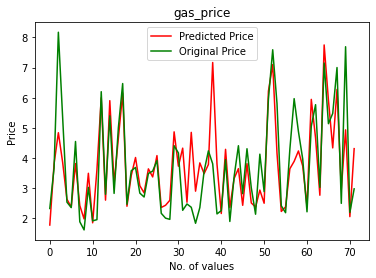

In [ ]:
plt.plot(y_pred,color="red",label="Predicted Price")
plt.plot(list(y_test),color="green",label="Original Price")
plt.title(target)
plt.xlabel('No. of values')
plt.ylabel('Price')
plt.legend()
plt.show()

## Sugar price predictions ##

In [ ]:
target = 'sugar_price'

In [ ]:
print(cor_mat[target])

oil_price       0.700688
coal_price      0.674670
gas_price      -0.020924
sugar_price     1.000000
ore_price       0.666584
copper_price    0.754051
Name: sugar_price, dtype: float64


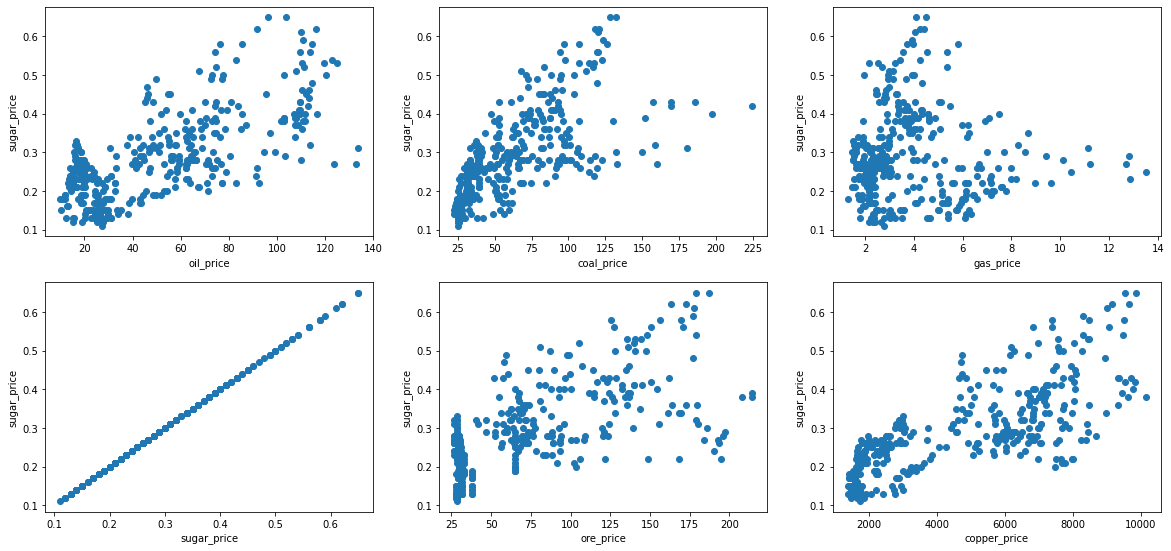

In [ ]:
plt.figure(figsize=(20, 60))
plotnumber = 1
for feature in continuous_features:
    ax = plt.subplot(12, 3, plotnumber)
    plt.scatter(totaldf[feature], totaldf[target])
    plt.xlabel(feature)
    plt.ylabel(target)
    plotnumber+=1
plt.show()

In [ ]:
X = totaldf.drop([target,'Month'],axis=1)
y = totaldf[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=0)

In [ ]:
X

,oil_price,coal_price,gas_price,ore_price,copper_price
0,17.60,39.50,1.28,33.10,2227.33
1,18.95,39.50,1.47,33.10,2215.33
2,19.90,39.50,1.59,33.10,2216.52
3,21.15,39.50,1.56,33.10,2299.20
4,20.25,39.50,1.75,33.10,2520.32
...,...,...,...,...,...
354,74.60,185.69,5.11,124.52,9324.71
355,83.65,224.51,5.48,122.91,9829.22
356,80.77,157.48,5.02,96.24,9728.90
357,74.31,169.65,3.73,116.96,9551.18


In [ ]:
len(X_train)

287

In [ ]:
len(X_test)

72

In [ ]:
pd.set_option('display.max_colwidth', 100)
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,decision_tree,0.640492,"{'criterion': 'squared_error', 'splitter': 'best'}"
1,RandomForestRegressor,0.659196,"{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 50}"
2,XGBRegressor,0.753075,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}"


In [ ]:
model_xgb = XGBRegressor(learning_rate = 0.5, max_depth = 3, n_estimators = 50, objective = 'reg:squarederror')

In [ ]:
model_xgb.fit(X_train, y_train)

XGBRegressor(learning_rate=0.5, n_estimators=50, objective='reg:squarederror')

In [ ]:
model_xgb.score(X_test, y_test)

0.716311697665257

In [ ]:
y_pred = model_xgb.predict(X_test)
y_pred

array([0.22080839, 0.37803644, 0.20891762, 0.43105662, 0.13506904,
       0.17497954, 0.59770095, 0.23716405, 0.32109973, 0.17478496,
       0.2417286 , 0.30722398, 0.29753852, 0.29740036, 0.18844745,
       0.29188237, 0.1550743 , 0.20627508, 0.24819559, 0.38046086,
       0.35599157, 0.46158105, 0.29006594, 0.14238155, 0.47646236,
       0.4254477 , 0.19763324, 0.14562383, 0.23761532, 0.18965185,
       0.4096098 , 0.29217568, 0.25480732, 0.20580226, 0.21695873,
       0.12210357, 0.13478905, 0.39955187, 0.32492125, 0.18070066,
       0.20962077, 0.25828803, 0.34560657, 0.30944082, 0.5342228 ,
       0.3069181 , 0.3633823 , 0.23563695, 0.20594439, 0.4051008 ,
       0.31796563, 0.1804677 , 0.20690075, 0.25663012, 0.19307232,
       0.24718013, 0.37814373, 0.22065932, 0.3206936 , 0.6074263 ,
       0.22703844, 0.21828857, 0.16681218, 0.2084325 , 0.2365531 ,
       0.17686468, 0.31898418, 0.36299008, 0.28392428, 0.2911653 ,
       0.24718013, 0.14450482], dtype=float32)

In [ ]:
y_test

6      0.21
259    0.41
106    0.23
215    0.56
90     0.15
       ... 
173    0.30
296    0.45
198    0.30
63     0.25
124    0.14
Name: sugar_price, Length: 72, dtype: float64

In [ ]:
error_score = metrics.r2_score(y_test,y_pred)
print("R squared:",error_score)

R squared: 0.716311697665257


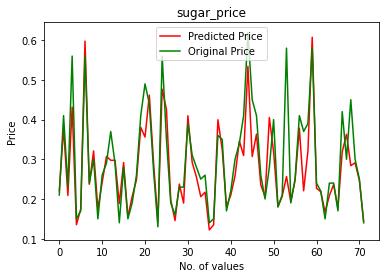

In [ ]:
plt.plot(y_pred,color="red",label="Predicted Price")
plt.plot(list(y_test),color="green",label="Original Price")
plt.title(target)
plt.xlabel('No. of values')
plt.ylabel('Price')
plt.legend()
plt.show()

## Ore price predictions ##

In [ ]:
target = 'ore_price'

In [ ]:
print(cor_mat[target])

oil_price       0.856426
coal_price      0.809668
gas_price       0.307179
sugar_price     0.666584
ore_price       1.000000
copper_price    0.892179
Name: ore_price, dtype: float64


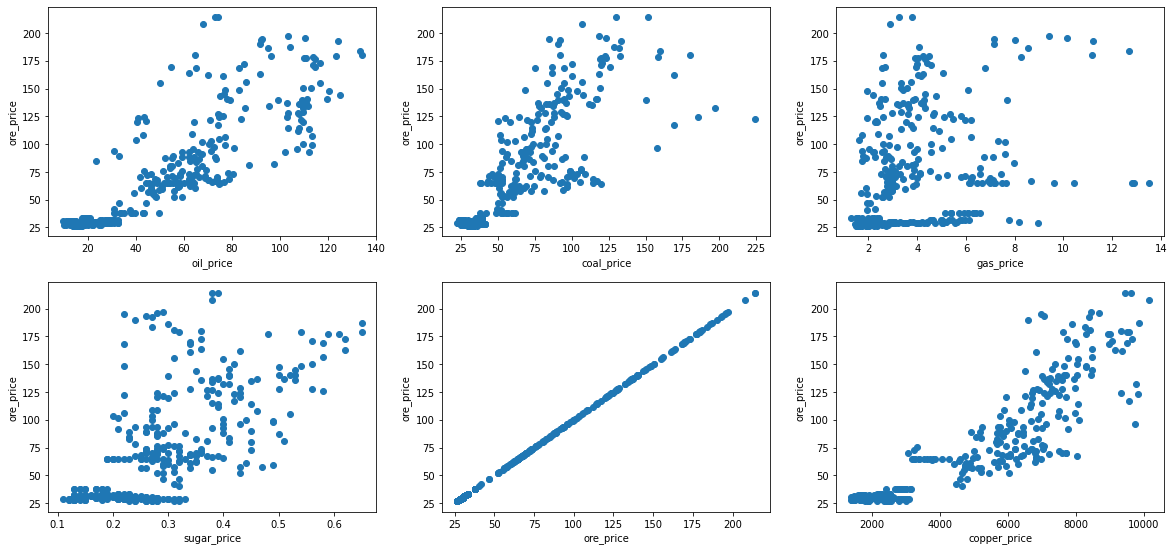

In [ ]:
plt.figure(figsize=(20, 60))
plotnumber = 1
for feature in continuous_features:
    ax = plt.subplot(12, 3, plotnumber)
    plt.scatter(totaldf[feature], totaldf[target])
    plt.xlabel(feature)
    plt.ylabel(target)
    plotnumber+=1
plt.show()

In [ ]:
X = totaldf.drop([target,'Month'],axis=1)
y = totaldf[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=0)

In [ ]:
X

,oil_price,coal_price,gas_price,sugar_price,copper_price
0,17.60,39.50,1.28,0.18,2227.33
1,18.95,39.50,1.47,0.21,2215.33
2,19.90,39.50,1.59,0.21,2216.52
3,21.15,39.50,1.56,0.23,2299.20
4,20.25,39.50,1.75,0.23,2520.32
...,...,...,...,...,...
354,74.60,185.69,5.11,0.43,9324.71
355,83.65,224.51,5.48,0.42,9829.22
356,80.77,157.48,5.02,0.43,9728.90
357,74.31,169.65,3.73,0.42,9551.18


In [ ]:
len(X_train)

287

In [ ]:
len(X_test)

72

In [ ]:
pd.set_option('display.max_colwidth', 100)
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,decision_tree,0.868692,"{'criterion': 'friedman_mse', 'splitter': 'random'}"
1,RandomForestRegressor,0.865103,"{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 130}"
2,XGBRegressor,0.912740,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}"


In [ ]:
model_xgb = XGBRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 200, objective = 'reg:squarederror')

In [ ]:
model_xgb.fit(X_train, y_train)

XGBRegressor(n_estimators=200, objective='reg:squarederror')

In [ ]:
model_xgb.score(X_test, y_test)

0.9531733400714368

In [ ]:
y_pred = model_xgb.predict(X_test)
y_pred

array([ 30.896154, 116.24823 ,  32.287796, 110.922745,  29.265348,
        29.808489, 172.76247 ,  30.602074,  30.990622,  29.294186,
        27.44937 ,  58.772114,  79.007126,  74.014404,  35.389748,
        71.00111 ,  30.149603,  58.8473  ,  30.231842,  76.12945 ,
       104.13453 , 125.749565,  29.690596,  29.565557, 127.9357  ,
        94.1971  ,  30.30802 ,  30.30802 ,  28.46078 ,  28.994848,
       139.92654 ,  53.44048 ,  29.975979,  30.403038,  30.231842,
        29.33327 ,  29.36097 , 138.24937 ,  63.87052 ,  29.808489,
        29.536314,  54.053646,  57.23771 ,  73.69578 , 183.36855 ,
        74.34151 , 132.8721  ,  27.964163,  29.77456 ,  91.66129 ,
        75.21479 ,  31.75029 , 112.9597  , 139.39783 ,  30.896154,
        30.403038, 128.70432 , 140.0616  , 108.95891 , 189.50063 ,
        30.602074,  29.708227,  31.130293,  29.719913, 164.94275 ,
        38.624294, 140.4502  ,  78.380775,  75.37902 , 160.74388 ,
        30.403038,  28.620617], dtype=float32)

In [ ]:
y_test

6       33.10
259    132.57
106     30.03
215    127.49
90      27.59
        ...  
173     69.80
296     73.10
198    139.64
63      30.15
124     29.31
Name: ore_price, Length: 72, dtype: float64

In [ ]:
error_score = metrics.r2_score(y_test,y_pred)
print("R squared:",error_score)

R squared: 0.9531733400714368


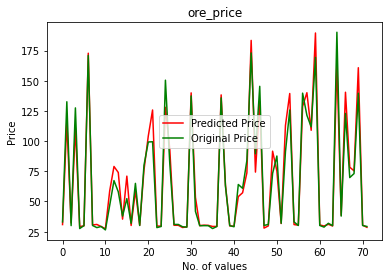

In [ ]:
plt.plot(y_pred,color="red",label="Predicted Price")
plt.plot(list(y_test),color="green",label="Original Price")
plt.title(target)
plt.xlabel('No. of values')
plt.ylabel('Price')
plt.legend()
plt.show()

## Copper price predictions ##

In [ ]:
target = 'copper_price'

In [ ]:
print(cor_mat[target])

oil_price       0.883285
coal_price      0.855654
gas_price       0.238688
sugar_price     0.754051
ore_price       0.892179
copper_price    1.000000
Name: copper_price, dtype: float64


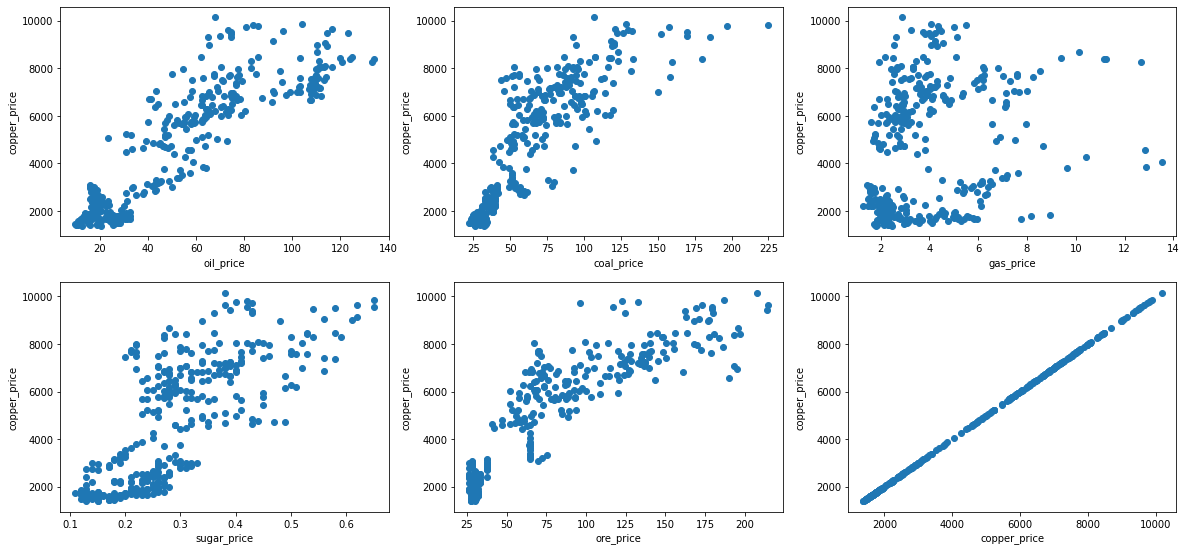

In [ ]:
plt.figure(figsize=(20, 60))
plotnumber = 1
for feature in continuous_features:
    ax = plt.subplot(12, 3, plotnumber)
    plt.scatter(totaldf[feature], totaldf[target])
    plt.xlabel(feature)
    plt.ylabel(target)
    plotnumber+=1
plt.show()

In [ ]:
X = totaldf.drop([target,'Month'],axis=1)
y = totaldf[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=0)

In [ ]:
X

,oil_price,coal_price,gas_price,sugar_price,ore_price
0,17.60,39.50,1.28,0.18,33.10
1,18.95,39.50,1.47,0.21,33.10
2,19.90,39.50,1.59,0.21,33.10
3,21.15,39.50,1.56,0.23,33.10
4,20.25,39.50,1.75,0.23,33.10
...,...,...,...,...,...
354,74.60,185.69,5.11,0.43,124.52
355,83.65,224.51,5.48,0.42,122.91
356,80.77,157.48,5.02,0.43,96.24
357,74.31,169.65,3.73,0.42,116.96


In [ ]:
len(X_train)

287

In [ ]:
len(X_test)

72

In [ ]:
pd.set_option('display.max_colwidth', 100)
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,decision_tree,0.917929,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
1,RandomForestRegressor,0.932706,"{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}"
2,XGBRegressor,0.956598,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}"


In [ ]:
model_xgb = XGBRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 200, objective = 'reg:squarederror')

In [ ]:
model_xgb.fit(X_train, y_train)

XGBRegressor(n_estimators=200, objective='reg:squarederror')

In [ ]:
model_xgb.score(X_test, y_test)

0.9652814517031213

In [ ]:
y_pred = model_xgb.predict(X_test)
y_pred

array([2317.1191, 7139.1494, 1662.1783, 7853.735 , 1727.6661, 1627.9415,
       8896.653 , 2241.845 , 2785.812 , 1620.4504, 2156.9224, 4306.2573,
       6861.621 , 5695.994 , 2715.2668, 5658.725 , 1650.2036, 3564.5781,
       2364.2747, 5869.63  , 6110.168 , 7532.054 , 2485.7437, 1662.5808,
       9071.61  , 6612.0044, 1644.291 , 1559.7496, 1936.4594, 1835.8823,
       7498.3613, 4380.01  , 2502.116 , 2307.5122, 2447.041 , 1723.3009,
       1581.1963, 7202.0103, 5385.414 , 1638.6532, 1789.3496, 4455.5117,
       4740.273 , 5890.225 , 8953.542 , 5473.729 , 7380.369 , 1925.2096,
       1644.291 , 6328.6284, 5734.621 , 1822.7826, 6169.6743, 7156.565 ,
       2287.5884, 2201.6492, 7715.3394, 7169.9155, 7056.413 , 8993.762 ,
       2201.6492, 1855.0558, 1626.1089, 2266.0303, 7385.49  , 2853.022 ,
       9429.8   , 6835.618 , 4646.268 , 8122.3423, 2201.6492, 1571.4803],
      dtype=float32)

In [ ]:
y_test

6      2414.06
259    7203.02
106    1787.50
215    6848.18
90     1750.34
        ...   
173    7695.66
296    5450.93
198    6990.86
63     2612.62
124    1589.46
Name: copper_price, Length: 72, dtype: float64

In [ ]:
error_score = metrics.r2_score(y_test,y_pred)
print("R squared:",error_score)

R squared: 0.9652814517031213


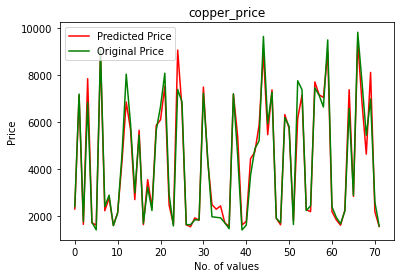

In [ ]:
plt.plot(y_pred,color="red",label="Predicted Price")
plt.plot(list(y_test),color="green",label="Original Price")
plt.title(target)
plt.xlabel('No. of values')
plt.ylabel('Price')
plt.legend()
plt.show()